<a href="https://colab.research.google.com/github/dtegegn/deepdream/blob/master/Seletech_dati_normalizzati_puri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Seletech classificazione dati normalizzati di materiali puri</h1>



# Import Google Drive

In [0]:
!pip install tensorflow==2
!pip install tqdm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import libraries

In [0]:
import pandas as pd
import numpy as np 

from keras import optimizers 
from keras.models import Sequential 
from keras.layers import Dense
#from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras import Sequential
from keras.utils import np_utils

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline 
import matplotlib.pylab as plt 
from sklearn.model_selection import train_test_split 

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm
import time

import tensorflow as tf 



# Load Dataset

In [3]:
# load dataset
dataframe = pd.read_csv("/content/drive/My Drive/Seletech/table/tablePureNormMaterial.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:702].astype(float)
Y = dataset[:,702]
print(dataset.shape)

(7200, 703)


## Split dataset

In [4]:
print(X.shape)
print(Y.shape)
print(np.unique(Y))

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

print("\nX_train:\n")
print(X_train.shape)
print(y_train.shape)
print("\nX_test:\n")
print(X_test.shape)


(7200, 702)
(7200,)
['BabyMilk' 'Cocoa' 'CornFlour' 'CornStarch' 'PotatoStarch' 'RiceStarch'
 'Sugar' 'WheatStarch']

X_train:

(5760, 702)
(5760,)

X_test:

(1440, 702)


In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

print(dummy_y.shape)

(5760, 8)


In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)

print(dummy_y_test.shape)

(1440, 8)


# Grid Search

## Model Create

In [0]:
def create_model(optimizer="RMSprop"):
  #Create model
  grid_model = Sequential()
  grid_model.add(Dense(8,input_dim= 702, activation='relu'))
  grid_model.add(Dense(256, activation='relu'))
  grid_model.add(Dense(512, activation='relu'))
  grid_model.add(Dense(256, activation='relu'))
  grid_model.add(Dense(8, activation='softmax'))

  #compile model
  grid_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
  return grid_model

## Model Compile

In [8]:
 # fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
grid_model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['SGD', 'RMSprop', 'Adam']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=grid_model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 84.0min


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 115.4min finished


Best: 0.957465 using {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}
0.924132 (0.025778) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'SGD'}
0.499653 (0.272101) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'RMSprop'}
0.615278 (0.357891) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'Adam'}
0.927604 (0.024829) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'SGD'}
0.296181 (0.254976) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'RMSprop'}
0.392708 (0.385611) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adam'}
0.950694 (0.018809) with: {'batch_size': 5, 'epochs': 150, 'optimizer': 'SGD'}
0.450347 (0.282988) with: {'batch_size': 5, 'epochs': 150, 'optimizer': 'RMSprop'}
0.394271 (0.387451) with: {'batch_size': 5, 'epochs': 150, 'optimizer': 'Adam'}
0.922569 (0.036098) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
0.384896 (0.374563) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}
0.610938 (0.352077) with: {'batch_size':

# Model Test

In [25]:
!pip install scikit-learn

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, grid.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

    BabyMilk       1.00      1.00      1.00       178
       Cocoa       1.00      1.00      1.00       175
   CornFlour       1.00      0.99      1.00       198
  CornStarch       0.68      1.00      0.81       184
PotatoStarch       0.99      1.00      1.00       160
  RiceStarch       1.00      1.00      1.00       184
       Sugar       1.00      1.00      1.00       176
 WheatStarch       1.00      0.53      0.69       185

    accuracy                           0.94      1440
   macro avg       0.96      0.94      0.94      1440
weighted avg       0.96      0.94      0.94      1440




In [31]:
print('Confusion Matrix')
cnf = confusion_matrix(y_pred,y_true)
print(cnf)

Confusion Matrix
[[178   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0]
 [  0   0 197   0   0   0   0   0]
 [  0   0   0 184   0   0   0  87]
 [  0   0   1   0 160   0   0   0]
 [  0   0   0   0   0 184   0   0]
 [  0   0   0   0   0   0 176   0]
 [  0   0   0   0   0   0   0  98]]


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[178   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0]
 [  0   0 197   0   0   0   0   0]
 [  0   0   0 184   0   0   0  87]
 [  0   0   1   0 160   0   0   0]
 [  0   0   0   0   0 184   0   0]
 [  0   0   0   0   0   0 176   0]
 [  0   0   0   0   0   0   0  98]]


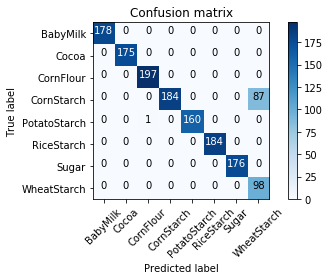

In [41]:
disp = plot_confusion_matrix(cnf, np.unique(Y))


plt.show()

# Create Model

In [0]:
def baseline_model():
  #create model
  model= Sequential()
  model.add(Dense(8, input_dim=702, activation = 'relu'))
  model.add(Dense(8, activation='softmax'))
  #compile model
  with tf.device('/GPU:0'):
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(), metrics=['acc'],)
  return model

# Train Model






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 5624      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
Total params: 5,696
Trainable params: 5,696
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5760 samples, validate on 1440 samples
Epoch 1/100





5760/5760 [==============================] - 2s 325us/step - loss: 1.9012 - acc: 0.2017 - val_loss: 1.8143 - val_acc: 0.2333
Epoch 2/100
5760/5760 [==============================] - 2s 286us/step - loss: 1.7760 - acc: 0.2776 - val_loss: 1.7498 - val_acc: 0.3042
Epoch 3/100
5760/5760 [==============================] - 2s 303us/step - loss: 1.6942

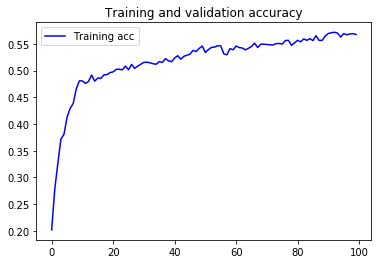

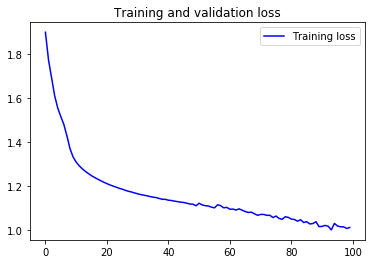

In [57]:
# Compile the model
model = baseline_model()
model.summary()


# Train the Model
with tf.device('/GPU:0'):
  history = model.fit(x=X_train, 
                      y=dummy_y, 
                      validation_data = (X_test,dummy_y_test),
                      batch_size=10, 
                      epochs=100, 
                      verbose=1
                      )

# Save the Model
#model.save('/content/drive/My Drive/artigianale.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
#plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




## Model Test

In [67]:

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, model.predict(X_test)
for i in range(len(X_test)):
	print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

X=[1.       0.994941 0.990703 0.985644 0.982554 0.980266 0.975663 0.972758
 0.969556 0.964206 0.96117  0.957233 0.953842 0.950779 0.946951 0.943123
 0.938447 0.934099 0.929997 0.926114 0.921438 0.918184 0.913208 0.90845
 0.903391 0.898004 0.893355 0.887968 0.882062 0.875827 0.870276 0.863549
 0.857698 0.851518 0.8449   0.83883  0.831501 0.8242   0.818212 0.811676
 0.804293 0.797648 0.791578 0.78496  0.778152 0.771561 0.765272 0.759612
 0.75242  0.746076 0.740443 0.734509 0.72811  0.722614 0.717063 0.711758
 0.706153 0.700738 0.69609  0.690375 0.684523 0.680011 0.674269 0.669948
 0.665546 0.661225 0.656412 0.651736 0.647635 0.64408  0.640197 0.636095
 0.634126 0.630134 0.627017 0.623325 0.62204  0.620098 0.617911 0.61668
 0.615532 0.613891 0.610719 0.608532 0.607192 0.606071 0.603527 0.602133
 0.60052  0.598469 0.596199 0.594668 0.594148 0.593547 0.5925

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



X=[0.995722 0.993761 0.98978  0.988057 0.985526 0.983006 0.976776 0.974465
 0.97037  0.967166 0.963636 0.958966 0.955544 0.953405 0.94902  0.944991
 0.938931 0.935936 0.93148  0.926916 0.923102 0.92     0.914403 0.909233
 0.90492  0.900571 0.89697  0.891052 0.886524 0.880214 0.874866 0.868378
 0.863993 0.857683 0.851301 0.845241 0.838823 0.832799 0.825241 0.819037
 0.811266 0.805704 0.797968 0.793012 0.785704 0.779144 0.773654 0.766952
 0.761533 0.755187 0.74984  0.743672 0.738503 0.731586 0.727451 0.721604
 0.715793 0.71066  0.705669 0.700963 0.697255 0.692906 0.68738  0.683708
 0.679465 0.676114 0.672513 0.669127 0.665668 0.663351 0.658111 0.654153
 0.651836 0.648485 0.645455 0.643387 0.640392 0.637362 0.634795 0.632335
 0.631943 0.630553 0.628307 0.62574  0.623601 0.622032 0.620285 0.619251
 0.617504 0.616292 0.614118 0.612478 0.611765 0.611016 0.610481 0.608841
 0.60795  0.606952 0.605526 0.604242 0.603636 0.603244 0.60303  0.603387
 0.602353 0.602638 0.60328  0.603636 0.604385 0.6

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



X=[0.988316 0.996105 0.990479 0.988965 0.990523 0.99075  0.986878 0.987017
 0.985503 0.981921 0.979877 0.97715  0.976663 0.976177 0.974846 0.97384
 0.971016 0.969393 0.969166 0.968452 0.966829 0.966212 0.963421 0.960565
 0.958455 0.955956 0.954463 0.952775 0.950081 0.947322 0.945375 0.942032
 0.940896 0.939305 0.937228 0.934664 0.931321 0.9284   0.926647 0.923888
 0.92048  0.917916 0.913372 0.910451 0.906134 0.903246 0.901818 0.898897
 0.895618 0.89221  0.890003 0.886725 0.884745 0.881954 0.879098 0.876144
 0.872801 0.870367 0.867413 0.865401 0.86248  0.861084 0.85826  0.855599
 0.854333 0.852451 0.849529 0.84755  0.846219 0.844044 0.841545 0.83989
 0.838462 0.836871 0.834826 0.833139 0.832554 0.830445 0.829146 0.828952
 0.828465 0.826972 0.825868 0.824538 0.823823 0.823012 0.821552 0.820415
 0.818955 0.817007 0.815514 0.814898 0.814021 0.813729 0.813015 0.812756
 0.811717 0.810938 0.810419 0.809705 0.809802 0.80912  0.808374 0.807692
 0.806491 0.805712 0.805972 0.806686 0.806686 0.807